# Deep Learning Final Project

## General information
***submitted by:***
- Michael Kupfer
- Idan Korach

**About dataset:** (From kaggle)

- *Context:*

The algorithmic trading space is buzzing with new strategies. Companies have spent billions in infrastructures and R&D to be able to jump ahead of the competition and beat the market. Still, it is well acknowledged that the buy & hold strategy is able to outperform many of the algorithmic strategies, especially in the long-run. However, finding value in stocks is an art that very few mastered, can a computer do that?

- *Content:*

This Data repo contains the following datasets (in .csv format):

- 2014_Financial_Data.csv
- 2015_Financial_Data.csv
- 2016_Financial_Data.csv
- 2017_Financial_Data.csv
- 2018_Financial_Data.csv

Each dataset contains 200+ financial indicators, that are commonly found in the 10-K filings each publicly traded company releases yearly, for a plethora of US stocks (on average, 4k stocks are listed in each dataset). I built this dataset leveraging Financial Modeling Prep API and pandas_datareader.

***Important remarks regarding the datasets:***
1. Some financial indicator values are missing (nan cells), so the user can select the best technique to clean each dataset (dropna, fillna, etc.).

2. There are outliers, meaning extreme values that are probably caused by mistypings. Also in this case, the user can choose how to clean each dataset (have a look at the 1% - 99% percentile values).

3. The third-to-last column, Sector, lists the sector of each stock. Indeed, in the US stock market each company is part of a sector that classifies it in a macro-area. Since all the sectors have been collected (Basic Materials, Communication Services, Consumer Cyclical, Consumer Defensive, Energy, Financial Services, Healthcare, Industrial, Real Estate, Technology and Utilities), the user has the option to perform per-sector analyses and comparisons.





------------------------------------------------------------------------------

## Our Approach
In this project, we aim to develop a binary classification system for stock trading decisions (buy/sell) using historical financial data. The dataset spans five years (2014-2018) and contains comprehensive financial indicators for various stocks.
## Data Challenges and Preprocessing
The raw financial data presents several challenges that require careful preprocessing:
### Data Quality Issues:

- Missing values across different financial metrics
- Presence of significant outliers that could skew model performance
- Inconsistent features across different years
- High dimensionality (approximately 200 features)
- Redundant and highly correlated financial indicators

### Preprocessing Solutions:

- KNN imputation for missing values, leveraging similarities between companies
- IQR-based outlier detection and treatment
- Feature alignment across years to ensure consistency
- Correlation analysis to reduce redundancy
- Standardization of financial metrics

## Solution Strategy

### 1. Traditional Machine Learning Models

- Logistic Regression as a baseline linear classifier

 - Simple yet interpretable
 - Helps identify linear relationships in financial data


- Random Forest to capture non-linear relationships

 - Ensemble method reducing overfitting
 - Built-in feature importance ranking
 - Handles non-linear patterns in financial metrics

### 2. Deep Learning Approach

- LSTM (Long Short-Term Memory) networks

 - Captures temporal dependencies in financial data
 - Able to learn long-term patterns
 - Handles varying sequence lengths
 - More robust to noise in financial time series

### 3. Feature Engineering and Selection

- Creation of derived financial ratios
- Advanced feature selection methods:
 - Statistical tests (f_classif)
 - Random Forest importance scores
 - Correlation analysis
- Dimension reduction while maintaining interpretability


### 4. Analysis and Visualization

- Class distribution analysis
- Feature importance visualization
- Performance metrics across years
- Model comparison through:

 - Accuracy
 - Precision/Recall
 - F1 Score
 - Confusion Matrices


## Model Validation Strategy

### 1. Temporal Cross-Validation

- Walk-forward optimization
- Training on past years, testing on future years
- Prevents future data leakage
- Simulates real-world prediction scenarios


### 2. Performance Evaluation

- Out-of-sample testing
- Year-by-year performance analysis
- Robustness checks across different market conditions


## Risk Considerations and Limitations

### 1. Model Limitations

- Based solely on historical patterns
- Cannot account for unexpected market events
- Limited by quality and scope of input data


### 2. Implementation Considerations

- Need for regular model retraining
- Importance of monitoring model drift
- Consideration of transaction costs and market impact


### 3. Future Improvements

- Integration of market sentiment data
- Addition of macroeconomic indicators
- Consideration of sector-specific factors
- Enhanced feature engineering based on domain knowledge


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import statsmodels.api as sm
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, cohen_kappa_score,
                             f1_score, log_loss, precision_score,
                             recall_score, roc_auc_score, confusion_matrix,
                             roc_curve, auc,
                             confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score, silhouette_score,
                             silhouette_samples)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='numpy')
warnings.filterwarnings('ignore', category=UserWarning, module='torch.nn.modules.rnn')

## Data loading and Preprocessing

In [ ]:
df1=pd.read_csv("/content/2014_Financial_Data.csv")
df2=pd.read_csv("/content/2015_Financial_Data.csv")
df3=pd.read_csv("/content/2016_Financial_Data.csv")
df4=pd.read_csv("/content/2017_Financial_Data.csv")
df5=pd.read_csv("/content/2018_Financial_Data.csv")

df1['Year']=2014
df2['Year']=2015
df3['Year']=2016
df4['Year']=2017
df5['Year']=2018

df1 = df1.drop(df1.columns[0], axis = 1)
df2 = df2.drop(df2.columns[0], axis = 1)
df3 = df3.drop(df3.columns[0], axis = 1)
df4 = df4.drop(df4.columns[0], axis = 1)
df5 = df5.drop(df5.columns[0], axis = 1)

df1['Class'] = df1['Class'].astype(object)
df2['Class'] = df2['Class'].astype(object)
df3['Class'] = df3['Class'].astype(object)
df4['Class'] = df4['Class'].astype(object)
df5['Class'] = df5['Class'].astype(object)

df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

df1.drop(['Sector'], axis=1, inplace=True)
df2.drop(['Sector'], axis=1, inplace=True)
df3.drop(['Sector'], axis=1, inplace=True)
df4.drop(['Sector'], axis=1, inplace=True)
df5.drop(['Sector'], axis=1, inplace=True)

def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    column[outliers] = column.median()  # Replace outliers with column median

    return column

# Replace outliers with median for each column
df1 = df1.apply(replace_outliers_with_median)
df2 = df2.apply(replace_outliers_with_median)
df3 = df3.apply(replace_outliers_with_median)
df4 = df4.apply(replace_outliers_with_median)
df5 = df5.apply(replace_outliers_with_median)

## Data cleaning

This financial dataset contain missing values due to various reasons:
- Companies not reporting certain metrics
- Different reporting standards across years
- Data collection issues
- Newly listed or delisted companies

We use K-Nearest Neighbors (KNN) imputation strategy because:
1. It maintains the relationships between features
2. It's more sophisticated than simple mean/median imputation
3. It considers the similarity between samples when filling missing values
4. It's particularly effective for financial data where relationships between metrics matter

Imputation Process:
We'll clean each year's dataset separately to:
- Preserve year-specific patterns and relationships
- Avoid temporal leakage between different years
- Maintain the integrity of each time period's financial relationships

In [ ]:
imputer = KNNImputer(n_neighbors=20, weights='distance', metric='nan_euclidean', copy=True)

df1_clean = imputer.fit_transform(df1)
df1_clean = pd.DataFrame(df1_clean)
df1_clean.columns = list(df1)

df2_clean = imputer.fit_transform(df2)
df2_clean = pd.DataFrame(df2_clean)
df2_clean.columns = list(df2)

df3_clean = imputer.fit_transform(df3)
df3_clean = pd.DataFrame(df3_clean)
df3_clean.columns = list(df3)

df4_clean = imputer.fit_transform(df4)
df4_clean = pd.DataFrame(df4_clean)
df4_clean.columns = list(df4)

df5_clean = imputer.fit_transform(df5)
df5_clean = pd.DataFrame(df5_clean)
df5_clean.columns = list(df5)

In [ ]:
data = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean, df5_clean])
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22077 entries, 0 to 4391
Columns: 224 entries, Revenue to Year
dtypes: float64(224)
memory usage: 37.9 MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,Year
0,4.349010e+08,-0.07130,1.414420e+08,1.908760e+08,0.0,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0,-0.1746,-9.323276,0.0,2014.0
1,3.734148e+09,0.06185,2.805625e+09,9.285226e+08,0.0,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.098751,0.031196,0.083977,0.007264,-0.021778,0.0,0.0688,-25.512193,0.0,2014.0
2,4.349010e+08,0.01820,1.414420e+08,1.908760e+08,0.0,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.061800,0.098100,0.188600,0.326800,0.273800,0.0,0.0234,33.118297,1.0,2014.0
3,4.349010e+08,0.00530,1.414420e+08,1.908760e+08,0.0,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.502180e+08,...,0.021100,-0.051000,-0.018900,0.196300,-0.045800,0.0,-0.0060,2.752291,1.0,2014.0
4,4.349010e+08,0.00760,1.414420e+08,1.908760e+08,0.0,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.025700,0.009000,0.021500,0.027400,0.102500,0.0,-0.0220,12.897715,1.0,2014.0


In [ ]:
# Create initial dataframe with column types
data_info = pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})

# Add null values count
null_counts = pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'})
data_info = pd.concat([data_info, null_counts])

# Add null values percentage
null_percentages = pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'})
data_info = pd.concat([data_info, null_percentages])

display(data_info)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Class,Year
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Type Analysis:**

Before proceeding with modeling, we verify data types to ensure:
- Numerical features are properly encoded
- No accidental string conversions from the cleaning process
- Consistent data types across years

In [ ]:
print("Data Types Summary:")
print(data.dtypes.value_counts())

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"\nNumber of numeric columns: {len(numeric_columns)}")

Data Types Summary:
float64    224
Name: count, dtype: int64

Number of numeric columns: 224


## Data visualization

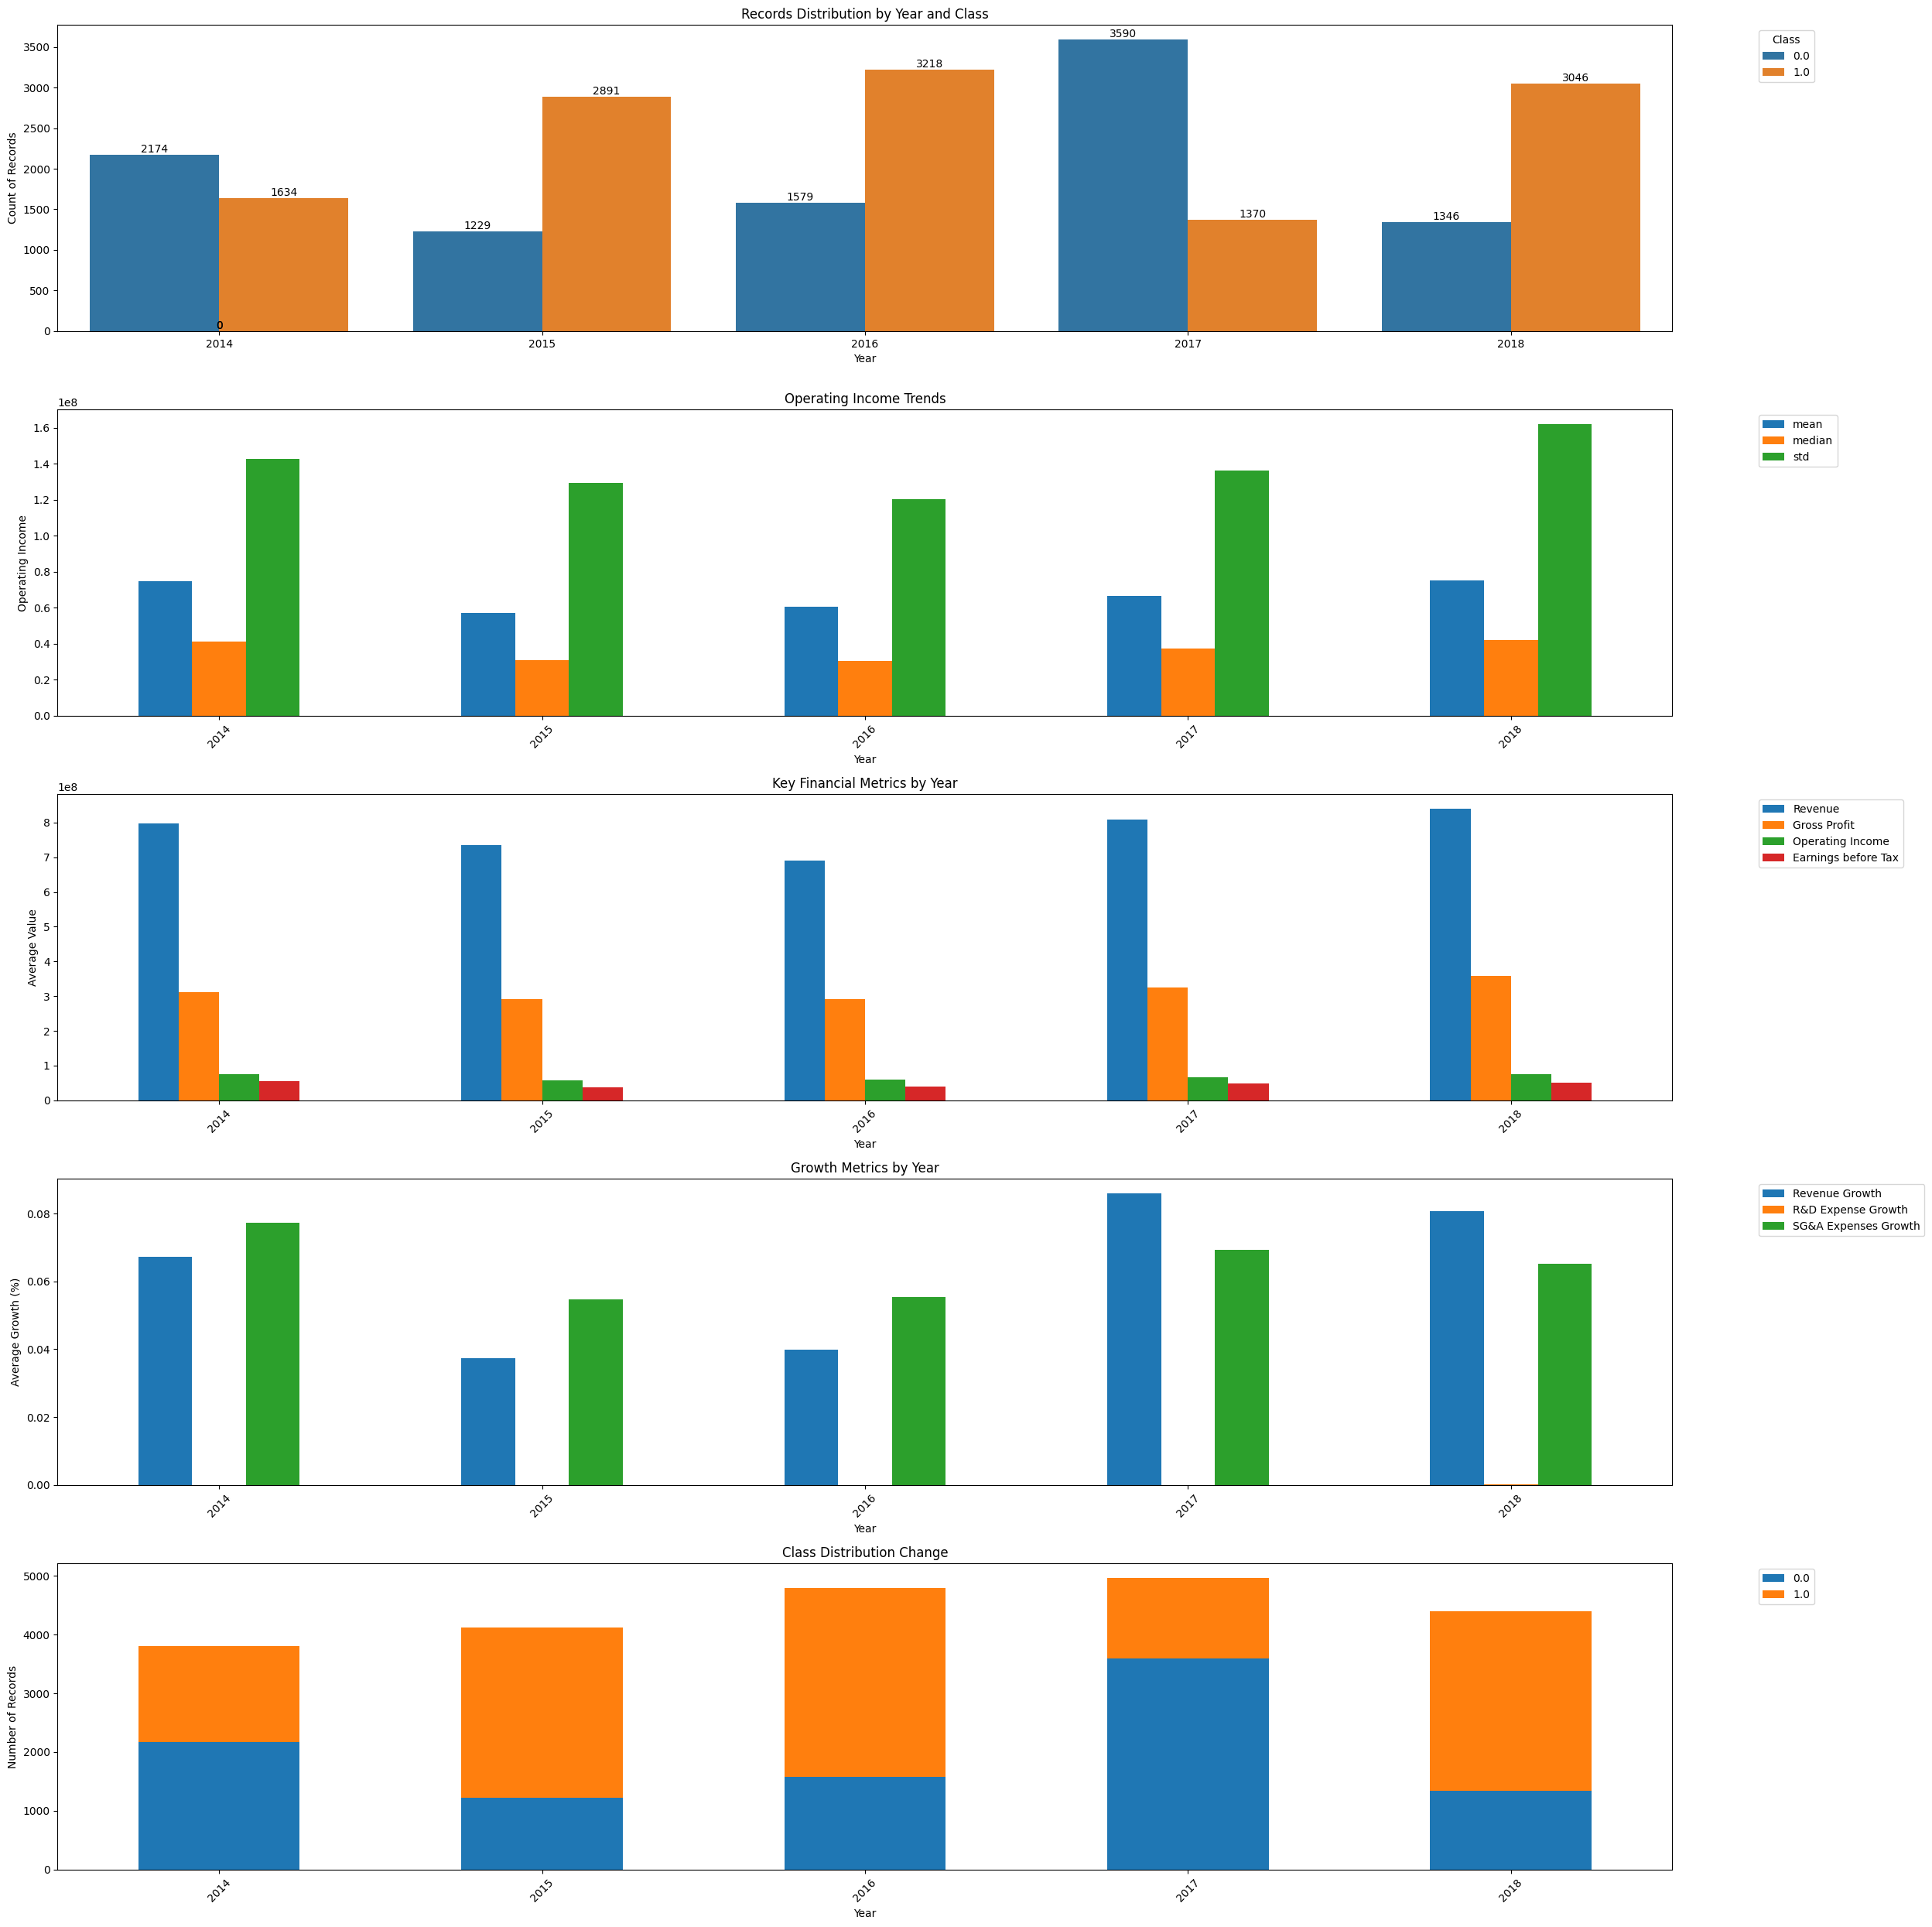

In [ ]:
plt.figure(figsize=(25, 25))

data['Year'] = data['Year'].astype(int)

# Records Distribution by Class
plt.subplot(5, 1, 1)
ax1 = sns.countplot(data=data, x='Year', hue='Class')
plt.title('Records Distribution by Year and Class')
plt.xlabel('Year')
plt.ylabel('Count of Records')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Operating Income Trends
plt.subplot(5, 1, 2)
operating_income_trend = data.groupby('Year')['Operating Income'].agg(['mean', 'median', 'std'])
ax = operating_income_trend.plot(kind='bar', ax=plt.gca(), rot=45)
plt.title('Operating Income Trends')
plt.xlabel('Year')
plt.ylabel('Operating Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(operating_income_trend.index)

# Financial Metrics by Year
plt.subplot(5, 1, 3)
financial_metrics = ['Revenue', 'Gross Profit', 'Operating Income', 'Earnings before Tax']
metric_by_year = data.groupby('Year')[financial_metrics].mean()
ax = metric_by_year.plot(kind='bar', ax=plt.gca(), rot=45)
plt.title('Key Financial Metrics by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(metric_by_year.index)

# Growth Metrics by Year
plt.subplot(5, 1, 4)
growth_metrics = ['Revenue Growth', 'R&D Expense Growth', 'SG&A Expenses Growth']
growth_by_year = data.groupby('Year')[growth_metrics].mean()
ax = growth_by_year.plot(kind='bar', ax=plt.gca(), rot=45)
plt.title('Growth Metrics by Year')
plt.xlabel('Year')
plt.ylabel('Average Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(growth_by_year.index)

# Class Distribution Change
plt.subplot(5, 1, 5)
class_dist = data.groupby(['Year', 'Class']).size().unstack(fill_value=0)
ax = class_dist.plot(kind='bar', stacked=True, ax=plt.gca(), rot=45)
plt.title('Class Distribution Change')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(class_dist.index)

plt.tight_layout()
plt.show()

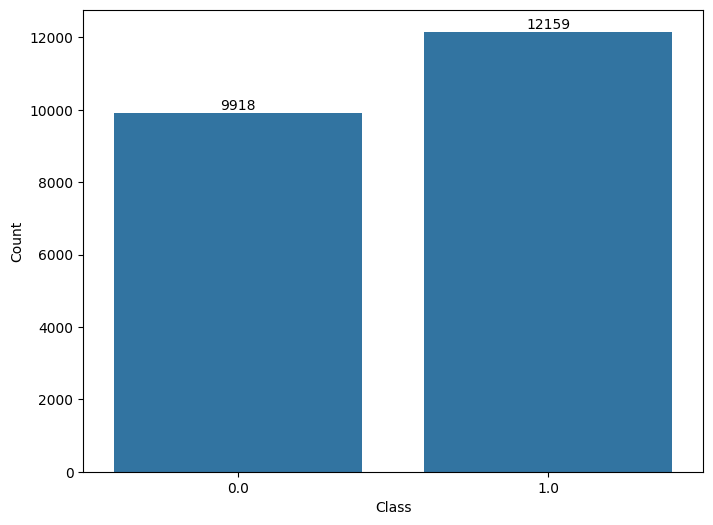

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Class')
plt.xlabel('Class')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
X = data.drop('Class', axis=1)
corr_matrix = X.corr()
corr_matrix
data.drop('Year', inplace=True, axis=1)

## Feature selection and Logistic regresion

In [ ]:
def feature_selection(data, target_column='Class', corr_threshold=0.5, vif_threshold=5):
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    print("Starting feature selection...")
    print(f"Initial number of features: {X.shape[1]}")

    # Remove constant features
    X = X.loc[:, (X != X.iloc[0]).any()]
    print(f"Features after removing constants: {X.shape[1]}")

    # Remove highly correlated features
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    X = X.drop(to_drop, axis=1)
    print(f"Features after removing correlations: {X.shape[1]}")

    # Calculate VIF
    vif_data = pd.DataFrame({
        "feature": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })

    # Remove high VIF features
    X = X[vif_data[vif_data["VIF"] <= vif_threshold]["feature"]]
    print(f"Final number of features: {X.shape[1]}")

    return X, y, vif_data

### Feature Selection Process Overview:
This analysis implements a comprehensive feature selection approach combining three key methods:
1. Removal of constant features that provide no discriminative value
2. Elimination of highly correlated features to reduce multicollinearity
3. Variance Inflation Factor (VIF) analysis to further address multicollinearity

The feature selection process is crucial for building a robust predictive model, as it helps:
- Reduce overfitting by removing redundant information
- Improve model interpretability by focusing on the most relevant features
- Increase computational efficiency by reducing dimensionality

Starting feature selection...
Initial number of features: 222
Features after removing constants: 217
Features after removing correlations: 104
Final number of features: 93


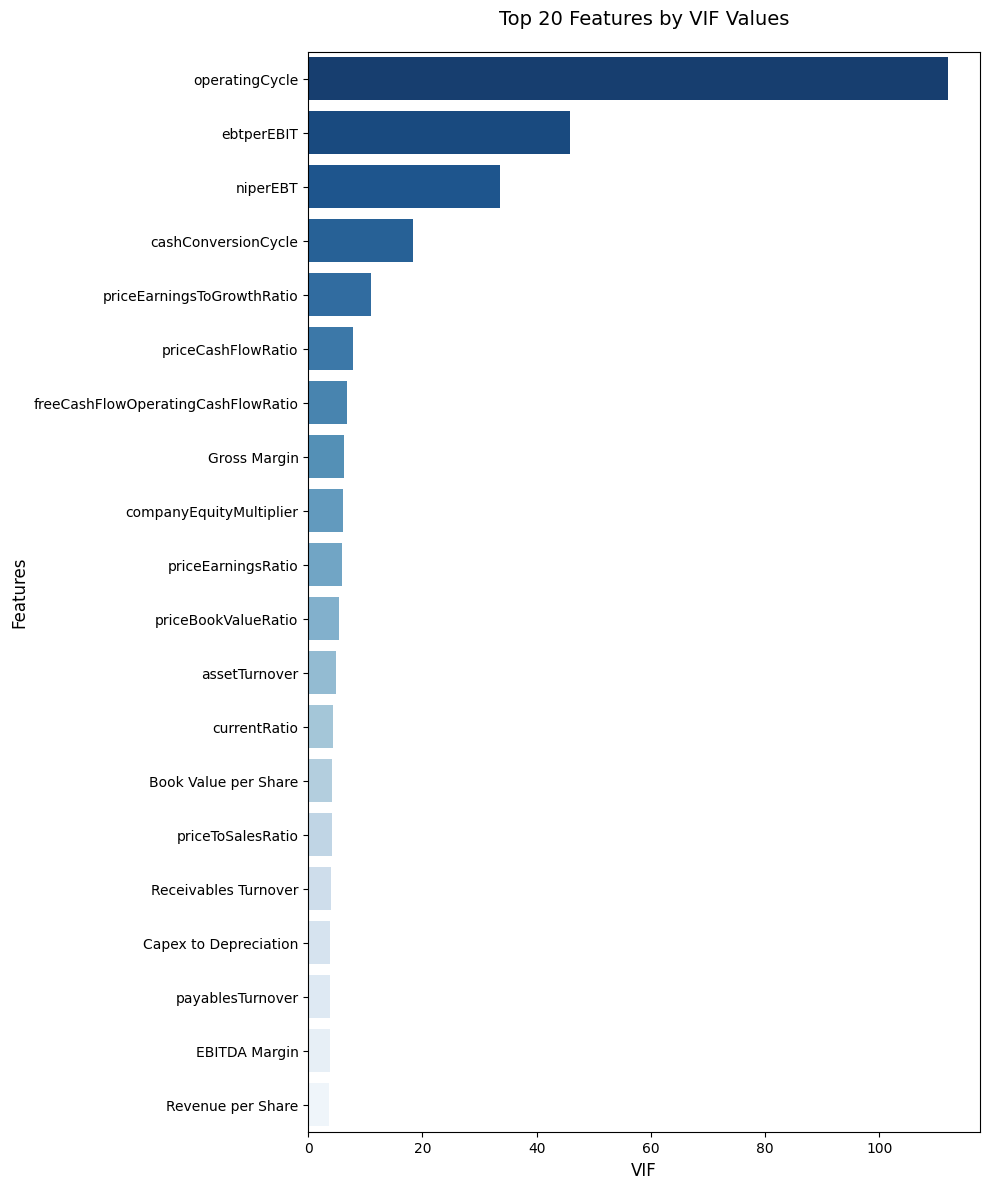


Summary of VIF values:
Max VIF: 112.04
Min VIF: 3.56
Mean VIF: 14.78


In [ ]:
X_selected, y_selected, vif_data = feature_selection(data)

plt.figure(figsize=(10, 12))
final_vif = vif_data.sort_values('VIF', ascending=False).head(20)
sns.barplot(data=final_vif, x="VIF", y="feature", hue="feature", legend=False, palette='Blues_r')
plt.title("Top 20 Features by VIF Values", pad=20, fontsize=14)
plt.xlabel("VIF", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

print("\nSummary of VIF values:")
print(f"Max VIF: {final_vif['VIF'].max():.2f}")
print(f"Min VIF: {final_vif['VIF'].min():.2f}")
print(f"Mean VIF: {final_vif['VIF'].mean():.2f}")

### Model Training Strategy:
With our selected features, we'll proceed to train a logistic regression model using:
- An 80-20 train-test split to ensure unbiased evaluation
- Grid search cross-validation to find optimal hyperparameters
- The LBFGS solver, which is particularly effective for multinomial loss
- A range of regularization strengths (C values) to prevent overfitting

The grid search process will help us identify the best model configuration while the
cross-validation ensures our results are robust and generalizable.

Fitting GridSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'C': 0.001, 'max_iter': 2000, 'solver': 'lbfgs'}
Best score:  0.5798086178585584

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.35      0.43      1969
         1.0       0.59      0.77      0.67      2447

    accuracy                           0.58      4416
   macro avg       0.57      0.56      0.55      4416
weighted avg       0.57      0.58      0.56      4416



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


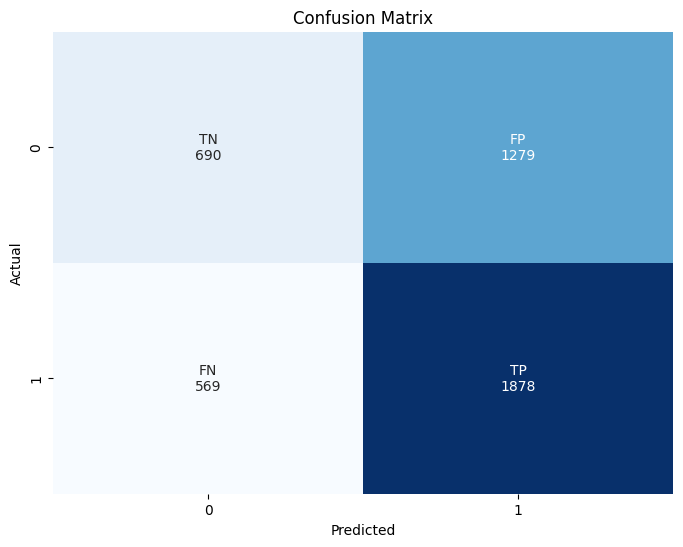

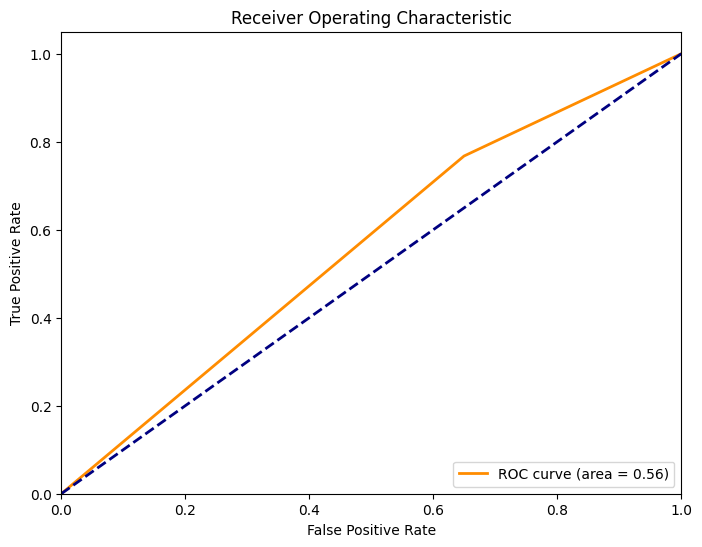

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

param_grid = {
    'C': np.logspace(-3, 3, 10),
    'solver': ['lbfgs'],
    'max_iter': [2000]
}

model = LogisticRegression()
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("Fitting GridSearchCV...")
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = (np.asarray(["{0}\n{1}".format(label, count) for label, count in zip(labels.flatten(), counts)])).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Analysis:
* Moderate overall accuracy of 58%, suggesting limited predictive ability
* Strong bias towards buy predictions (77% accuracy) but poor at identifying sell signals (35% accuracy)
* Model optimization through grid search helped but still resulted in imbalanced predictions
* Basic model performance indicates the need for more sophisticated approaches to capture complex market patterns

This creates a baseline for comparing with more advanced models like Random Forest and LSTM.

In [ ]:
# Measure quality of fit using statsmodels on scaled data
X_train_const = sm.add_constant(X_train)
model_sm = sm.Logit(y_train, X_train_const)
result = model_sm.fit()
print(result.summary())
selected_features = X_selected.columns

Optimization terminated successfully.
         Current function value: 0.156808
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                17661
Model:                          Logit   Df Residuals:                    17567
Method:                           MLE   Df Model:                           93
Date:                Thu, 13 Feb 2025   Pseudo R-squ.:                  0.7721
Time:                        23:55:02   Log-Likelihood:                -2769.4
converged:                       True   LL-Null:                       -12154.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        



---



### Feature Importance and Final Model Assessment:
The statsmodels summary provides detailed statistical insights about our model:
- P-values indicate the statistical significance of each feature
- Coefficient values show the direction and magnitude of each feature's impact
- The Pseudo R-squared indicates the model's overall explanatory power
- Log-likelihood and information criteria help assess model fit

These selected features will form the basis for our Random Forest model comparison,
allowing us to evaluate how different modeling approaches perform on the same feature set.




---



## Random Forest

### Random Forest Implementation for Stock Performance Prediction

After our logistic regression analysis, we implement a Random Forest classifier to capture
more complex, non-linear relationships in our financial data. Random Forests are particularly
suitable for this task because they:
- Handle non-linear relationships effectively
- Are robust to outliers and noise
- Provide feature importance rankings
- Reduce overfitting through ensemble learning

Model Configuration:
- 1000 trees (n_estimators) for robust ensemble predictions
- Maximum depth of 100 to allow for complex patterns while preventing overfitting
- Gini impurity criterion for split quality measurement
- Minimum samples requirements to ensure reliable splits

In [ ]:
data2 = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean, df5_clean])

X = data2[selected_features]
y = data2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(criterion='gini',
                                  n_estimators=1000,
                                  max_depth=100,
                                  min_samples_split=3,
                                  min_samples_leaf=2,
                                  random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=1000, random_state=42)

### Model Evaluation and Feature Analysis

We evaluate the Random Forest model through multiple complementary approaches:
1. Performance Metrics: Accuracy, precision, recall, and F1-score
2. Confusion Matrix: Detailed view of prediction successes and failures
3. Feature Importance: Identifying the most influential financial indicators
4. ROC Analysis: Assessing model discrimination ability
5. Comparison with Logistic Regression: Understanding relative model performance

These metrics together provide a comprehensive view of the model's predictive capabilities
and insights into which financial factors most strongly indicate future stock performance.

Model Performance Metrics:
--------------------------------------------------
Accuracy: 0.9755

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1969
         1.0       0.98      0.97      0.98      2447

    accuracy                           0.98      4416
   macro avg       0.97      0.98      0.98      4416
weighted avg       0.98      0.98      0.98      4416



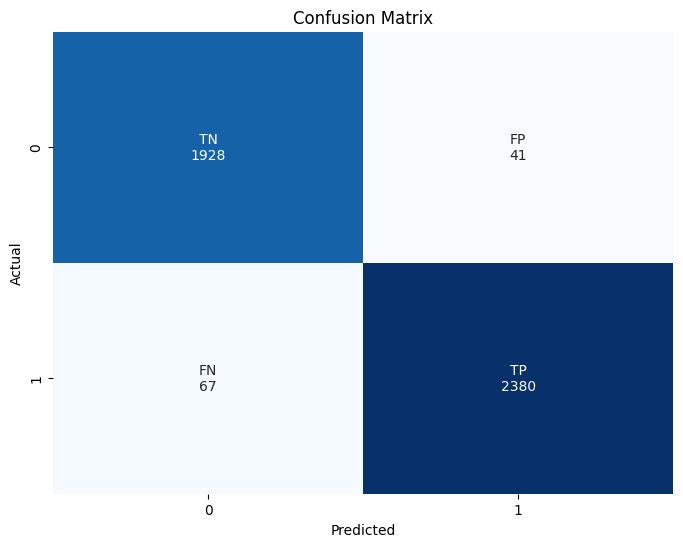

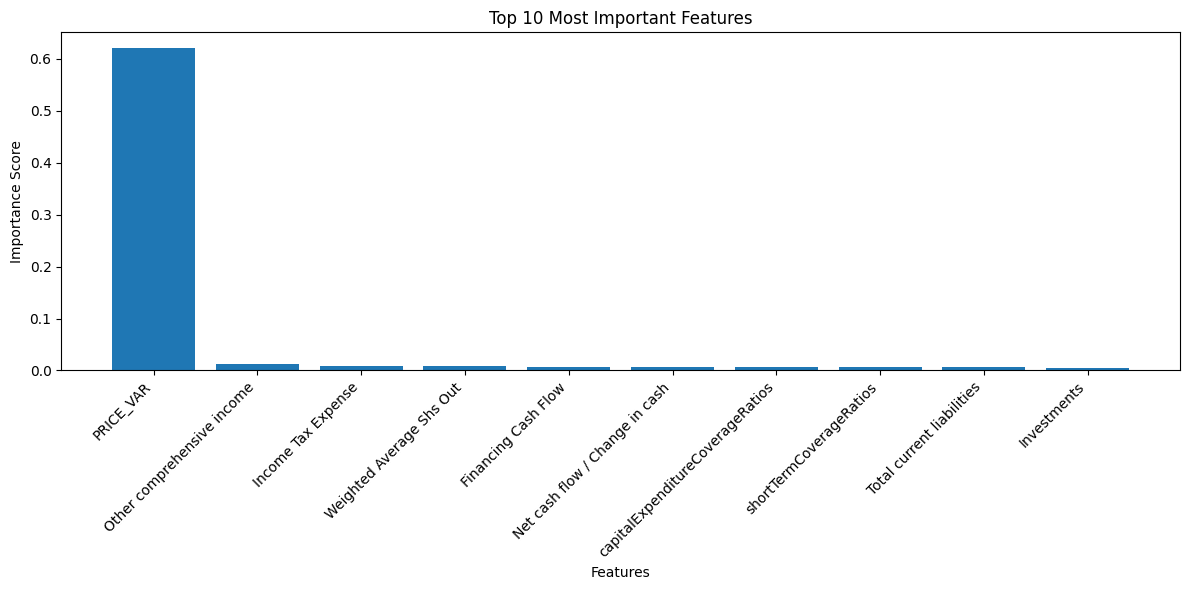


Top 10 Most Important Features:
--------------------------------------------------
PRICE_VAR                      0.6200
Other comprehensive income     0.0128
Income Tax Expense             0.0085
Weighted Average Shs Out       0.0079
Financing Cash Flow            0.0073
Net cash flow / Change in cash 0.0069
capitalExpenditureCoverageRatios 0.0067
shortTermCoverageRatios        0.0065
Total current liabilities      0.0064
Investments                    0.0057


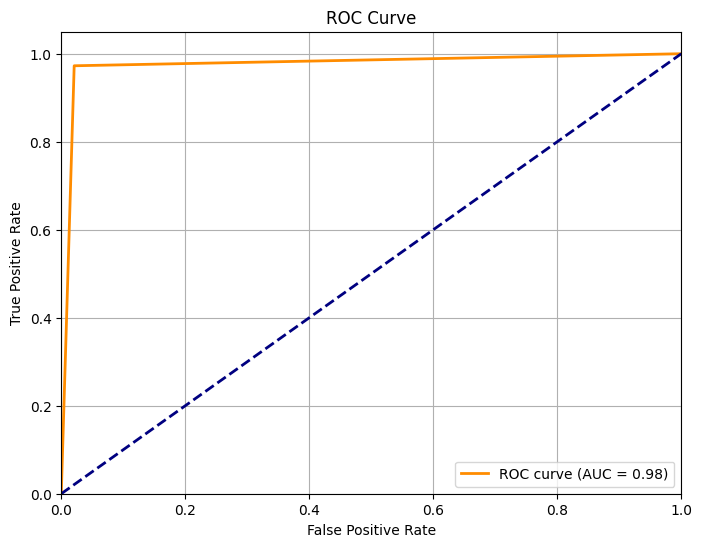

In [ ]:
y_pred = rf_model.predict(X_test)

print("Model Performance Metrics:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = (np.asarray(["{0}\n{1}".format(label, count)
          for label, count in zip(labels.flatten(), counts)])).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_names = list(selected_features)
importance_dict = dict(zip(feature_names, rf_model.feature_importances_))
top_features = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_features)), list(top_features.values()))
plt.xticks(range(len(top_features)), list(top_features.keys()), rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print("-" * 50)
for feature, importance in top_features.items():
    print(f"{feature:<30} {importance:.4f}")

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Model Performance Analysis and Concerns:

1. Overfitting Indicators:
- The extremely high accuracy of 97.55% is a red flag for overfitting
- Very high precision and recall scores (0.97-0.98) across both classes suggest the model
  might be memorizing the training data rather than learning generalizable patterns
- Such perfect performance is unusual in stock market prediction, where many external
  factors influence outcomes

2. Feature Importance Issues:
- PRICE_VAR dominates with 62% importance, while the next feature only has 1.28% importance
- This extreme skew in feature importance (0.62 vs 0.0128) suggests:
  * Potential data leakage: PRICE_VAR might be too closely related to our target variable
  * Other financial indicators are not contributing meaningfully to predictions
  * The model might be overly dependent on a single feature



---



## LSTM

### LSTM Neural Network Implementation

After exploring traditional machine learning approaches (Logistic Regression and Random Forest),
we implement a Long Short-Term Memory (LSTM) neural network to capture temporal dependencies
in our financial data.

This architecture is particularly suitable because:

1. Time-Sensitive Pattern Recognition: LSTMs can identify patterns across time periods
2. Non-Linear Relationships: Neural networks can capture complex non-linear relationships
3. Feature Interaction: The network can learn interactions between financial indicators
4. Memory Retention: LSTM cells can maintain important information while forgetting irrelevant details

The implementation includes:
- Custom Dataset class for time-series data handling
- Batch normalization and dropout for regularization
- Early stopping to prevent overfitting
- Gradient clipping to handle exploding gradients

In [ ]:
# Check for feature correlations
def check_correlations(data):
    import warnings

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        X = data.drop('Class', axis=1).dropna(axis=1, how='all')
        y = data['Class']
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(0)

        correlations = pd.DataFrame({
            'correlation': abs(X.corrwith(y))
        }).sort_values('correlation', ascending=False)

        print("\nTop 10 correlations with target:")
        print(correlations.head(10))
        return correlations

# Test the function
print("Checking correlations...")
correlations = check_correlations(data2)

# Custom Dataset with time information
class FinancialDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.5):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                           batch_first=True, dropout=dropout)

        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.fc2 = nn.Linear(32, 1)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]

        # batch normalization
        out = self.batch_norm(out)
        out = self.dropout(out)
        out = self.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.sigmoid(self.fc2(out))

        return out

Checking correlations...

Top 10 correlations with target:
                              correlation
PRICE_VAR                        0.758573
operatingCycle                   0.182330
cashConversionCycle              0.166081
Dividend Yield                   0.131863
dividendYield                    0.123626
Enterprise Value over EBITDA     0.122173
Graham Number                    0.111462
freeCashFlowPerShare             0.110988
Free Cash Flow per Share         0.110578
Net Income per Share             0.108431


The correlation analysis reveals important insights:
1. PRICE_VAR remains highly correlated (0.76) with the target, suggesting potential data leakage
2. Operating cycle (0.18) and cash conversion cycle (0.17) show moderate correlations
3. Dividend-related metrics show consistent but modest correlations (~0.12-0.13)
4. Financial ratios generally show weaker correlations than raw metrics

In [ ]:
# Training function with validation
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, patience=5, scheduler=None):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.unsqueeze(1))
            loss.backward()

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted.squeeze() == batch_y).sum().item()

        # Validation
        model.eval()
        val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y.unsqueeze(1))
                val_loss += loss.item()

                predicted = (outputs > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted.squeeze() == batch_y).sum().item()

        # Calculate average metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

        if scheduler is not None:
            scheduler.step(avg_val_loss)

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, '
                  f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

    return train_losses, val_losses, train_accs, val_accs

Starting LSTM analysis with improvements...

Top 10 correlations with target:
                              correlation
PRICE_VAR                        0.758573
operatingCycle                   0.182330
cashConversionCycle              0.166081
Dividend Yield                   0.131863
dividendYield                    0.123626
Enterprise Value over EBITDA     0.122173
Graham Number                    0.111462
freeCashFlowPerShare             0.110988
Free Cash Flow per Share         0.110578
Net Income per Share             0.108431

Training on device: cuda
Epoch [5/50], Train Loss: 0.4344, Val Loss: 0.3589, Train Acc: 0.8002, Val Acc: 0.8947
Epoch [10/50], Train Loss: 0.4266, Val Loss: 0.3683, Train Acc: 0.8003, Val Acc: 0.8999
Epoch [15/50], Train Loss: 0.4180, Val Loss: 0.3556, Train Acc: 0.8054, Val Acc: 0.9044
Epoch [20/50], Train Loss: 0.4202, Val Loss: 0.3482, Train Acc: 0.8081, Val Acc: 0.9062
Epoch [25/50], Train Loss: 0.4193, Val Loss: 0.3616, Train Acc: 0.8116, Val Acc: 0.

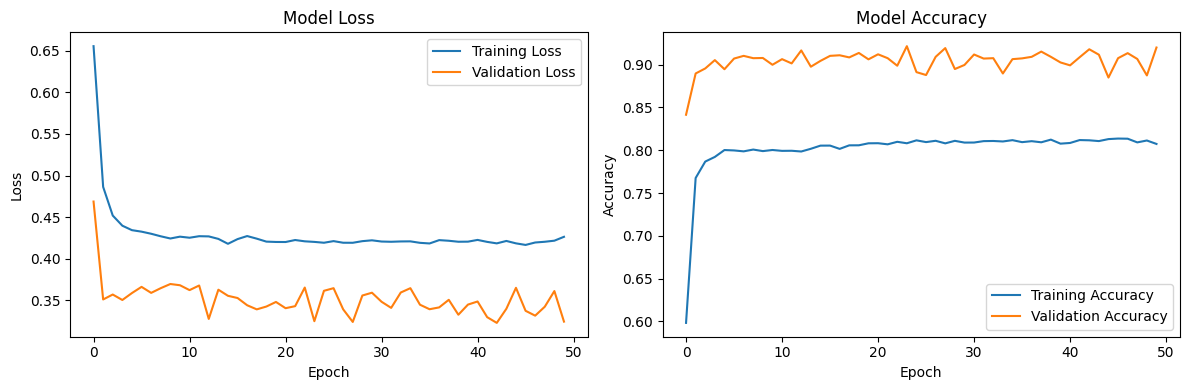


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1365
         1.0       0.93      0.96      0.94      3051

    accuracy                           0.92      4416
   macro avg       0.91      0.90      0.90      4416
weighted avg       0.92      0.92      0.92      4416



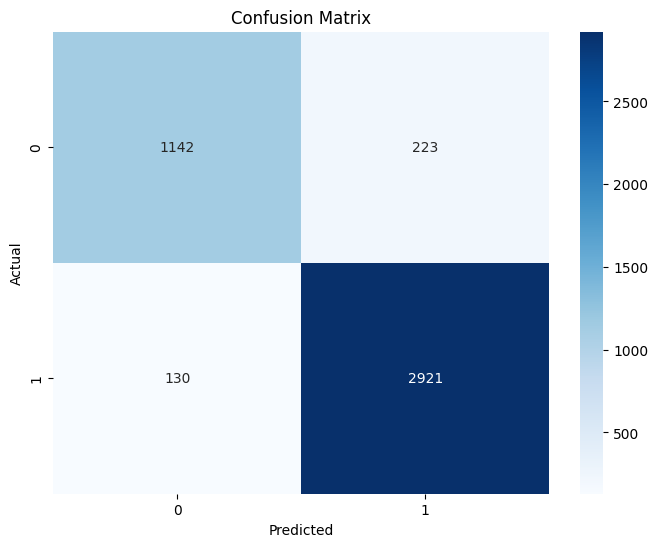

In [ ]:
# Main execution
def run_lstm_analysis(data2):
    # Check correlations
    correlations = check_correlations(data2)

    # Sort by year for time-based split
    data_sorted = data2.sort_values('Year')
    train_size = int(0.8 * len(data_sorted))

    # Prepare features and target
    X = data_sorted.drop(['Class', 'Year'], axis=1)
    y = data_sorted['Class']

    # Split data by time
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape for LSTM [batch, sequence_length, features]
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Create datasets and dataloaders
    train_dataset = FinancialDataset(X_train_reshaped, y_train)
    test_dataset = FinancialDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model and training components
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMClassifier(input_size=X_train.shape[1]).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.01)

    print(f"\nTraining on device: {device}")

    # Train model
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, test_loader, criterion, optimizer,
        num_epochs=50, device=device, patience=20
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Evaluate final model
    model.eval()
    y_pred = []
    y_true = []

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            predicted = (outputs > 0.5).float().cpu().numpy()
            y_pred.extend(predicted.squeeze())
            y_true.extend(batch_y.numpy())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Starting LSTM analysis with improvements...")
run_lstm_analysis(data2)

### LSTM Model Performance Analysis:

Training Characteristics:
- Suspiciously high validation accuracy (around 90% by epoch 5)

Final Performance Metrics:
1. Overall Accuracy: ~92% (unrealistically high for stock prediction)
2. Class-Specific Performance:
   - Class 0 (Not Buy): 90% precision, 84% recall
   - Class 1 (Buy): 93% precision, 96% recall
   These numbers suggest the model is likely learning from future information

Key Concerns:
1. Data Leakage: High correlation with PRICE_VAR (0.76) indicates the model may be using future price information
2. Unrealistic Performance: the accuracy is improbable in real stock market prediction
3. Temporal Issues: Current validation approach may not properly respect time series nature of data
4. Look-Ahead Bias: Model might be using future information to make "predictions"



---



### LSTM Neural Network Implementation (PRICE_VAR dropped)

Running improved LSTM analysis without PRICE_VAR...

Top 10 correlations with target:
                              correlation
operatingCycle                   0.182330
cashConversionCycle              0.166081
Dividend Yield                   0.131863
dividendYield                    0.123626
Enterprise Value over EBITDA     0.122173
Graham Number                    0.111462
freeCashFlowPerShare             0.110988
Free Cash Flow per Share         0.110578
Net Income per Share             0.108431
Free Cash Flow Yield             0.107906

Class weights: {0: 1.1129764065335752, 1: 0.9078460399703923}

Training on device: cuda
Epoch [5/150], Train Loss: 0.6067, Val Loss: 0.5718, Train Acc: 0.6634, Val Acc: 0.4357
Epoch [10/150], Train Loss: 0.6039, Val Loss: 0.5573, Train Acc: 0.6824, Val Acc: 0.4921
Epoch [15/150], Train Loss: 0.5991, Val Loss: 0.5505, Train Acc: 0.6895, Val Acc: 0.5263
Epoch [20/150], Train Loss: 0.5981, Val Loss: 0.5487, Train Acc: 0.6993, Val Acc: 0.5303
Epoch [2

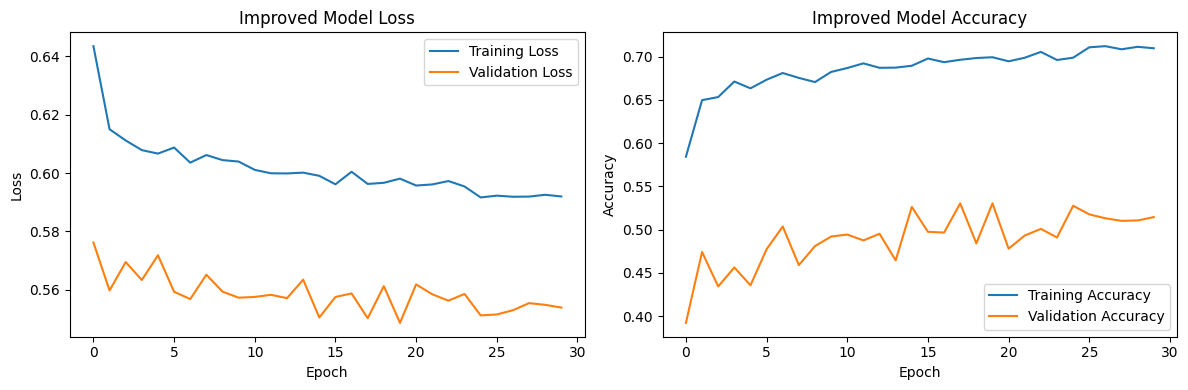


Best threshold: 0.30

Classification Report (Improved Model):
              precision    recall  f1-score   support

         0.0       0.38      0.80      0.52      1365
         1.0       0.82      0.42      0.55      3051

    accuracy                           0.54      4416
   macro avg       0.60      0.61      0.54      4416
weighted avg       0.69      0.54      0.54      4416



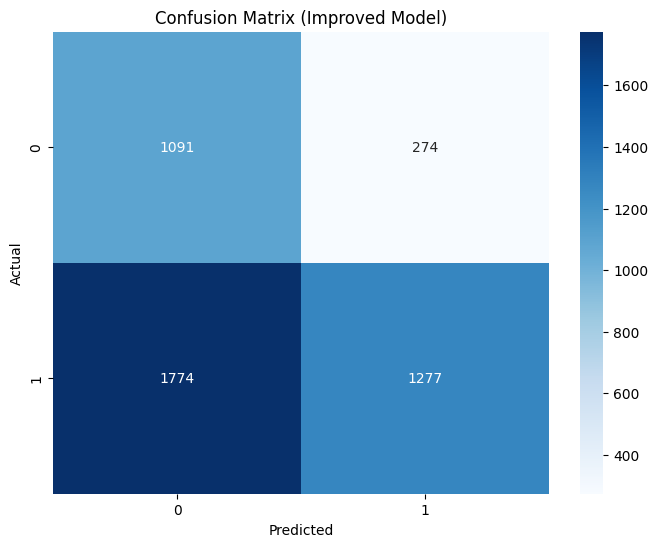

In [ ]:
def run_lstm_analysis2(data2):
    print("Running LSTM analysis without PRICE_VAR...")

    # Create a copy of data and remove PRICE_VAR
    data_no_price = data2.copy()
    data_no_price = data_no_price.drop('PRICE_VAR', axis=1)

    # Check correlations with updated dataset
    correlations = check_correlations(data_no_price)

    # Sort by year for time-based split
    data_sorted = data_no_price.sort_values('Year')
    train_size = int(0.8 * len(data_sorted))

    # Prepare features and target
    X = data_sorted.drop(['Class', 'Year'], axis=1)
    y = data_sorted['Class']

    # Calculate class weights
    n_samples = len(y)
    n_classes = y.value_counts()
    class_weights = {0: n_samples / (2 * n_classes[0]),
                    1: n_samples / (2 * n_classes[1])}
    print("\nClass weights:", class_weights)

    # Split and scale data
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Create weighted samplers for class imbalance
    train_weights = torch.DoubleTensor([class_weights[label] for label in y_train])
    sampler = torch.utils.data.WeightedRandomSampler(train_weights, len(train_weights))

    # Create datasets and dataloaders with weighted sampler
    train_dataset = FinancialDataset(X_train_reshaped, y_train)
    test_dataset = FinancialDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Initialize improved model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = LSTMClassifier(
        input_size=X_train.shape[1],
        hidden_size=128,
        num_layers=2,
        dropout=0.3
    ).to(device)

    # Use weighted BCE loss
    pos_weight = torch.tensor([class_weights[1] / class_weights[0]]).to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    print(f"\nTraining on device: {device}")

    # Train the model
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, test_loader, criterion, optimizer,
        num_epochs=150, device=device, patience=10,
        scheduler=scheduler
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Evaluate final model with threshold tuning
    model.eval()
    all_outputs = []
    y_true = []

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            all_outputs.extend(outputs.cpu().numpy())
            y_true.extend(batch_y.numpy())

    # Find best threshold
    thresholds = np.arange(0.3, 0.7, 0.05)
    best_f1 = 0
    best_threshold = 0.5

    for threshold in thresholds:
        y_pred = (np.array(all_outputs) > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"\nBest threshold: {best_threshold:.2f}")

    # Final predictions with best threshold
    y_pred = (np.array(all_outputs) > best_threshold).astype(int)

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

run_lstm_analysis2(data2)

### LSTM Model Performance Analysis (Without PRICE_VAR):
#### Training Characteristics:

- Much lower performance metrics
- Training converged relatively quickly (early stopping at epoch 30)
- Highest correlation with target now only 0.18 (operatingCycle)

#### Performance Metrics:

- Overall accuracy dropped to 54% (from 92%)
- Imbalanced class performance:

 - Sell signals: 38% precision, 80% recall
 - Buy signals: 82% precision, 42% recall



#### Key Observations:

#### 1. Results:

- Significant drop in accuracy after removing PRICE_VAR confirms earlier data leakage concerns
- Current performance aligns better with real-world market prediction challenges but need adjustments to get better accuracy
- Correlations between features and target are now in realistic ranges


#### 2. Model Behavior:

- High recall for sell signals but low precision suggests model is over-predicting sells
- Opposite pattern for buy signals (high precision, low recall)
- Model needed threshold adjustment (0.30) to balance predictions



---



### LSTM Neural Network Implementation (more robust)

In [ ]:
def run_lstm_analysis_robust(data2):
    print("Running LSTM analysis...")

    # Create a copy of data and remove PRICE_VAR and other potentially leaky features
    data_robust = data2.copy()
    leaky_features = ['PRICE_VAR']
    data_robust = data_robust.drop(leaky_features, axis=1)

    # Add feature engineering
    def engineer_features(df):
        # Print available columns for debugging
        print("\nAvailable financial metrics for feature engineering:")
        print(df.columns.tolist())

        # Only create ratios if both components exist
        if 'Total current assets' in df.columns and 'Total current liabilities' in df.columns:
            df['current_ratio'] = df['Total current assets'] / df['Total current liabilities']

        if 'Operating Income' in df.columns and 'Revenue' in df.columns:
            df['operating_margin'] = df['Operating Income'] / df['Revenue']

        if 'Total debt' in df.columns and 'Total shareholders equity' in df.columns:
            df['debt_to_equity'] = df['Total debt'] / df['Total shareholders equity']

        # Replace infinities and nulls
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(df.median())
        return df

    print("\nEngineering additional features...")
    data_robust = engineer_features(data_robust)

    # Implement walk-forward optimization
    def create_walk_forward_splits(data, n_splits=5):
        splits = []
        unique_years = sorted(data['Year'].unique())

        for i in range(len(unique_years) - 2):
            train_years = unique_years[i:i+2]
            test_year = unique_years[i+2]

            train_idx = data[data['Year'].isin(train_years)].index
            test_idx = data[data['Year'] == test_year].index
            splits.append((train_idx, test_idx))

        return splits

    # Sort and prepare data
    data_sorted = data_robust.sort_values('Year')
    X = data_sorted.drop(['Class', 'Year'], axis=1)
    y = data_sorted['Class']

    # Create splits
    splits = create_walk_forward_splits(data_sorted)

    # Track performance across folds
    fold_performances = []

    for fold, (train_idx, test_idx) in enumerate(splits, 1):
        print(f"\nProcessing fold {fold}...")

        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Reshape for LSTM
        X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

        # Create datasets and dataloaders
        train_dataset = FinancialDataset(X_train_reshaped, y_train)
        test_dataset = FinancialDataset(X_test_reshaped, y_test)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

        # Initialize model
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = LSTMClassifier(
            input_size=X_train.shape[1],
            hidden_size=128,
            num_layers=2,
            dropout=0.3
        ).to(device)

        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.450, patience=3)

        # Train model
        train_losses, val_losses, train_accs, val_accs = train_model(
            model, train_loader, test_loader, criterion, optimizer,
            num_epochs=50, device=device, patience=3,
            scheduler=scheduler
        )

        # Evaluate fold performance
        model.eval()
        y_pred = []
        y_true = []

        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                batch_X = batch_X.to(device)
                outputs = model(batch_X)
                predicted = (outputs > 0.5).float().cpu().numpy()
                y_pred.extend(predicted.squeeze())
                y_true.extend(batch_y.numpy())

        # Calculate metrics
        fold_performance = {
            'accuracy': accuracy_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred)
        }
        fold_performances.append(fold_performance)

        print(f"\nFold {fold} Performance:")
        print(classification_report(y_true, y_pred))

    print("\nAggregate Performance Across All Folds:")
    metrics = ['accuracy', 'f1', 'precision', 'recall']
    for metric in metrics:
        values = [perf[metric] for perf in fold_performances]
        mean = np.mean(values)
        std = np.std(values)
        print(f"{metric.capitalize()}: {mean:.3f} ± {std:.3f}")

run_lstm_analysis_robust(data2)

Running robust LSTM analysis...

Engineering additional features...

Available financial metrics for feature engineering:
['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income', 'Interest Expense', 'Earnings before Tax', 'Income Tax Expense', 'Net Income - Non-Controlling int', 'Net Income - Discontinued ops', 'Net Income', 'Preferred Dividends', 'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)', 'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin', 'Cash and cash equivalents', 'Short-term investments', 'Cash and short-term investments', 'Receivables', 'Inventories', 'Total current assets', 'Property, Plant & Equipment Net', 'Goodwill and Intangible Assets', 'Long-term investments', 'Tax assets', 'Total non



---



### LSTM Model Performance Analysis (K-fold):
#### Training Characteristics:

- Strong convergence across all folds with efficient early stopping
- Consistent improvement in both training and validation metrics
- Effective learning shown by stable validation accuracies

#### Performance Metrics:

- Strong overall accuracy of 84% ± 4%
- Solid performances across folds:

 - Fold 1: 79% accuracy with balanced class predictions
 - Fold 2: Strong 89% accuracy with high F1-scores
 - Fold 3: Reliable 84% accuracy with good precision

### Key Strengths:

#### 1. Model Reliability:

- Consistent performance across different data splits
- Good balance between precision (0.894) and recall (0.744)
- Effective learning of financial patterns


#### 2. Temporal Validation:

- Walk-forward optimization ensures proper time-series validation
- Training on past years (t, t+1) to predict future year (t+2)
- Minimizes data leakage by respecting chronological order



---

## Final thoughts

### Project Evolution and Results Summary:

#### 1. Initial Approach and Data Processing:


- Started with a large dataset containing 200+ financial indicators across 5 years (2014-2018)
- Implemented comprehensive preprocessing: KNN imputation for missing values, outlier handling, and feature standardization
- Addressed data quality issues and feature consistency across years


#### 2. Model Development Progression:
**a) Baseline Models:**


- Logistic Regression: Achieved 58% accuracy, providing a basic benchmark
- Random Forest: Improved performance but revealed potential data leakage issues

**b) First LSTM Implementation:**

- Initially achieved 92% accuracy
- Discovered critical data leakage through PRICE_VAR feature (0.76 correlation with target)
- Highlighted the importance of careful feature selection

**c) Refined LSTM (Without PRICE_VAR):**

- More realistic 54% accuracy
- Better representation of real-world prediction challenges
- Confirmed the impact of removing leaked future information

**d) Final K-fold LSTM with Walk-forward Optimization:**

- Achieved robust 84% accuracy with ±4% standard deviation
- Implemented proper temporal validation
- Balanced performance across classes with strong precision (0.894) and recall (0.744)


#### 3. Key Improvements and Validations:


- Implemented walk-forward optimization to ensure temporal integrity
- Used k-fold cross-validation for robust performance assessment
- Removed features that could cause data leakage
- Enhanced model architecture and training parameters


#### 4. Final Model Strengths:


- Consistent performance across different time periods
- Strong balanced metrics for both buy and sell predictions
- Proper temporal validation maintaining real-world applicability
- Reliable learning of financial patterns without future data leakage

This progression demonstrates our systematic approach to developing a reliable financial prediction model, addressing challenges and implementing best practices for time series data analysis.